### Perceptron Learning Algorithm Implementation

In [1]:
import numpy as np # importing numpy
import matplotlib.pyplot as plt # importing matplotlib
from sklearn.datasets import make_blobs # importing sklearn data generation library

#### Prepare Dataset

In [2]:
X, Y = make_blobs(n_samples=500, n_features=2, centers=2, shuffle=True, random_state=35)

In [3]:
print(X.shape, Y.shape)

(500, 2) (500,)


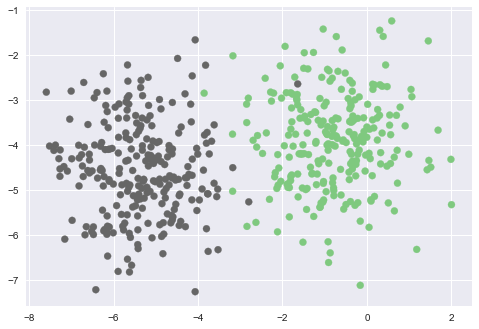

In [4]:
plt.style.use('seaborn')
plt.scatter(X[:, 0], X[:, 1], c = Y, cmap=plt.cm.Accent)
plt.show()

### Model And Helper Functions

In [5]:
def sigmoid(z): # Sigmoid calculator for a numpy array
    return 1.0/(1+np.exp(-z))

In [6]:
def predict(X, weights): # Prediction calculator to calculate predictions on data with certain wts
    predictions = np.dot(X, weights)
    return sigmoid(predictions)

In [7]:
def loss(X, Y, weights): # Loss calculator to cacluate the current loss in actual and predited wts
    """Binary Cross Entropy"""
    Y_ = predict(X, weights)
    cost = np.mean(-Y*np.log(Y_) - (1-Y)*np.log(1-Y_))
    return cost

In [8]:
def update(X, Y, weights, learning_rate): # Updates the weights for each epoch using gradient descent
    """Perform weight updates for 1 epoch"""
    Y_ = predict(X, weights)
    dw = np.dot(X.T, Y_ - Y)
    m = X.shape[0]
    weights = weights - learning_rate*dw/(float(m))
    return weights

In [13]:
def train(X, Y, learning_rate=0.5, maxEpochs=100): # train for multiple epochs using gradient descent
    # Modify the input to handle the bias
    ones = np.ones((X.shape[0],1))
    X = np.hstack((ones, X))
    # Init weights with 0
    weights = np.zeros(X.shape[1]) # n+1 entries
    # Iterate over all epochs and make updates
    loss_arr = []
    for epoch in range(maxEpochs):
        weights = update(X, Y, weights, learning_rate)
        if(epoch%10==0):
            l = loss(X, Y, weights)
            loss_arr.append(l)
            print("Epoch %d Loss %.4f"%(epoch, l))
    return weights, loss_arr

In [14]:
def getPredictions(X_test, weights, labels=True):
    if X_test.shape[1] != weights.shape[0]:
        ones = np.ones((X_test.shape[0], 1))
        X_test = np.hstack((ones, X_test))
    probs = predict(X_test, weights)
    if not labels:
        return probs
    else:
        labels = np.zeros(probs.shape)
        labels[probs>=0.5] = 1
        return labels

Epoch 0 Loss 0.5480
Epoch 10 Loss 0.2420
Epoch 20 Loss 0.1867
Epoch 30 Loss 0.1625
Epoch 40 Loss 0.1486
Epoch 50 Loss 0.1395
Epoch 60 Loss 0.1330
Epoch 70 Loss 0.1280
Epoch 80 Loss 0.1241
Epoch 90 Loss 0.1208
Epoch 100 Loss 0.1182
Epoch 110 Loss 0.1158
Epoch 120 Loss 0.1138
Epoch 130 Loss 0.1120
Epoch 140 Loss 0.1105
Epoch 150 Loss 0.1090
Epoch 160 Loss 0.1077
Epoch 170 Loss 0.1065
Epoch 180 Loss 0.1054
Epoch 190 Loss 0.1043
Epoch 200 Loss 0.1034
Epoch 210 Loss 0.1024
Epoch 220 Loss 0.1016
Epoch 230 Loss 0.1008
Epoch 240 Loss 0.1000
Epoch 250 Loss 0.0992
Epoch 260 Loss 0.0985
Epoch 270 Loss 0.0978
Epoch 280 Loss 0.0971
Epoch 290 Loss 0.0965
Epoch 300 Loss 0.0959
Epoch 310 Loss 0.0953
Epoch 320 Loss 0.0947
Epoch 330 Loss 0.0941
Epoch 340 Loss 0.0936
Epoch 350 Loss 0.0930
Epoch 360 Loss 0.0925
Epoch 370 Loss 0.0920
Epoch 380 Loss 0.0915
Epoch 390 Loss 0.0910
Epoch 400 Loss 0.0905
Epoch 410 Loss 0.0900
Epoch 420 Loss 0.0896
Epoch 430 Loss 0.0891
Epoch 440 Loss 0.0887
Epoch 450 Loss 0.0882

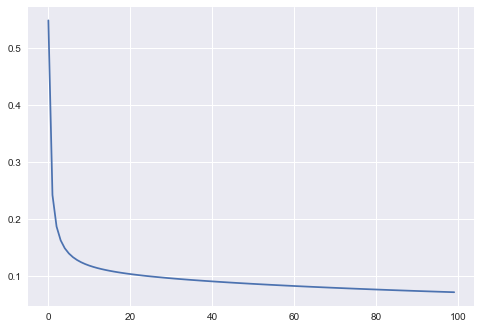

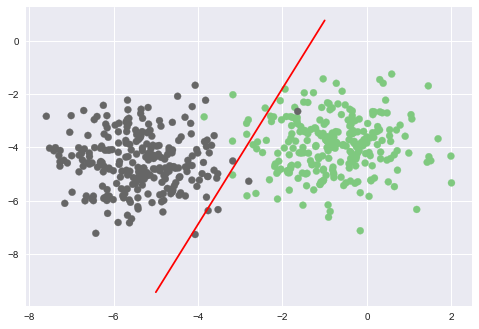

0.976


In [25]:
wts, loss_arr = train(X, Y, 0.2, 1000)
print(wts)
plt.plot(loss_arr)
plt.show()
x1 = np.linspace(-5, -1, 5)
x2 = -(wts[0] + wts[1]*x1)/wts[2]
plt.scatter(X[:, 0], X[:, 1], c = Y, cmap=plt.cm.Accent)
plt.plot(x1, x2, c='red')
plt.show()
Y_ = getPredictions(X, wts)
training_accuracy = np.sum(Y_==Y)/Y.shape[0]
print(training_accuracy)